In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    #BinaryEncoder,
    StandardScaler,
    PolynomialFeatures,
    FunctionTransformer,
)

Importación de datos de calidad de aire y mobilidad

inicialmente se leen los datos crudos desde los archivos descargables de las  respectivas fuentes, se procede a compilar todos los datos de calidad de aire en un solo dataframe que se convierte posteriormente a un archivo HDF5 el cual permite recolectar la información de manera más eficiente facilitando la lectura para proximas ocasiones, de igual maneraa se procede con los datos de mobilidad 

In [3]:
''' 
directory_path = 'C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Air Quality'
dfs = []

for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

merged_air = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to an HDF5 file
merged_air.to_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/air_dataframe.h5', key='df', mode='w')
'''

In [9]:
# Load the DataFrame from the HDF5 file
merged_air = pd.read_hdf('air_dataframe.h5', key='df')

In [4]:
merged_air.head()

,Fecha_Hora,codigoSerial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2021-01-01 00:00:00,12,31.0,1.0,49.0,1.0,-9999.0,1.0,-9999.0,4.31,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
1,2021-01-01 01:00:00,12,41.0,1.0,51.0,1.0,-9999.0,1.0,-9999.0,4.31,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
2,2021-01-01 02:00:00,12,38.0,1.0,51.0,1.0,-9999.0,1.0,-9999.0,4.31,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
3,2021-01-01 03:00:00,12,30.0,1.0,42.0,1.0,-9999.0,1.0,-9999.0,4.31,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
4,2021-01-01 04:00:00,12,29.0,1.0,39.0,1.0,-9999.0,1.0,-9999.0,4.31,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0


In [6]:
merged_air.describe()

,codigoSerial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,no2,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
count,248016.000000,248016.000000,248016.000000,248016.000000,248016.000000,248016.0,248016.0,248016.000000,248016.000000,248016.000000,...,248016.0,248016.0,248016.0,248016.0,248016.0,248016.0,248016.0,248016.0,248016.0,248016.0
mean,75.629669,402.838288,1.152254,-8610.302202,1.029214,-9999.0,1.0,-8686.866759,1.065289,-8687.209304,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
std,23.022977,7104.977566,0.581745,3469.630129,0.264055,0.0,0.0,3380.583890,0.398027,3379.647982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,12.000000,-9999.000000,1.000000,-9999.000000,1.000000,-9999.0,1.0,-9999.000000,1.000000,-9999.000000,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
25%,79.000000,9.759450,1.000000,-9999.000000,1.000000,-9999.0,1.0,-9999.000000,1.000000,-9999.000000,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
50%,83.000000,15.943150,1.000000,-9999.000000,1.000000,-9999.0,1.0,-9999.000000,1.000000,-9999.000000,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
75%,85.000000,23.168300,1.000000,-9999.000000,1.000000,-9999.0,1.0,-9999.000000,1.000000,-9999.000000,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
max,94.000000,119777.000000,4.320000,995.000000,4.310000,-9999.0,1.0,8529.000000,4.310000,125.845000,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0


del dataset anterior unicamente se tomaran en cuanta las columnas de fecha_hora, codigoSerial, pm25 y calidad_pm25, ya que, las demás columnas al tener valores de -9999 y calidad 1 significan que están fuera de servicio y por la descripción del dataset se evidencia que solo las columnas de pm25 tienen un comportamiento diferente al mencionado

In [ ]:
Air = merged_air[['']]

In [7]:
Target = pd.DataFrame(merged_air[['pm25']])

In [8]:
# Load the DataFrame from the HDF5 file
Mobilidad = pd.read_hdf('combined_dataframe.h5', key='df')

In [9]:
Mobilidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17010267 entries, 0 to 17010266
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Carril               object        
 1   Fecha Trafico        datetime64[ns]
 2   Fecha                datetime64[ns]
 3   Hora                 int64         
 4   dia                  object        
 5   dia-num              int64         
 6   mes-num              int64         
 7   mes                  object        
 8   año                  int64         
 9   Velocidad (Km/h)     float64       
 10  Corredor             object        
 11  sentido              object        
 12  Operación            object        
 13  Intensidad           float64       
 14  Nº vehiculos long 1  float64       
 15  Nº vehiculos long 2  float64       
 16  Nº vehiculos long 3  float64       
 17  Ocupación            float64       
 18  Tipo de Subsistema   object        
 19  Longitud             flo

In [10]:
Mobilidad.describe()

,Fecha Trafico,Fecha,Hora,dia-num,mes-num,año,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,...,Longitud,Latitud,codigo comuna,Nº vehiculos long 4,Intensidad (veh/h),Ocupación (%),Categoria 1 (Veh/h),Categoria 2 (Veh/h),Categoria 3 (Veh/h),Categoria 4 (Veh/h)
count,17010267,17010267,1.701027e+07,1.701027e+07,1.701027e+07,1.701027e+07,1.686219e+07,1.658923e+07,1.526234e+07,1.526234e+07,...,1.701027e+07,1.701027e+07,1.613348e+07,1.007739e+07,421033.000000,415788.000000,906707.000000,906707.000000,906707.000000,218383.000000
mean,2022-06-20 15:17:50.533465088,2022-06-20 03:47:05.238831104,1.151258e+01,4.003188e+00,6.287125e+00,2.021988e+03,2.557057e+01,4.537996e+02,2.587885e+02,6.357877e+01,...,8.337234e+05,1.171674e+06,2.000147e+01,8.207512e+01,335.692537,20.641639,275.574654,27.056302,26.772090,134.813461
min,2021-01-01 00:00:00,2021-01-01 00:00:00,0.000000e+00,1.000000e+00,1.000000e+00,2.021000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-10-22 02:00:00,2021-10-22 00:00:00,6.000000e+00,2.000000e+00,4.000000e+00,2.021000e+03,1.500000e+01,1.410000e+02,8.700000e+01,3.000000e+00,...,8.329248e+05,1.179418e+06,1.000000e+01,0.000000e+00,92.000000,4.000000,97.000000,2.000000,0.000000,28.000000
50%,2022-06-21 19:00:00,2022-06-21 00:00:00,1.200000e+01,4.000000e+00,6.000000e+00,2.022000e+03,2.300000e+01,3.290000e+02,2.030000e+02,1.600000e+01,...,8.340896e+05,1.181941e+06,1.100000e+01,1.900000e+01,247.000000,14.000000,222.000000,11.000000,4.000000,92.000000
75%,2023-02-21 03:00:00,2023-02-21 00:00:00,1.800000e+01,6.000000e+00,9.000000e+00,2.023000e+03,3.300000e+01,6.110000e+02,3.690000e+02,5.600000e+01,...,8.348136e+05,1.184007e+06,1.400000e+01,1.220000e+02,483.000000,33.000000,396.000000,32.000000,19.000000,188.000000
max,2023-10-31 23:00:00,2023-10-31 00:00:00,2.300000e+01,7.000000e+00,1.200000e+01,2.023000e+03,2.540000e+02,2.015893e+08,1.093800e+04,9.175040e+05,...,8.373073e+05,1.189696e+06,1.020000e+02,3.048000e+03,5209.000000,100.000000,2496.000000,643.000000,1536.000000,1711.000000
std,NaN,NaN,6.919387e+00,1.998625e+00,3.256980e+00,7.836282e-01,1.433707e+01,4.951948e+04,2.352094e+02,2.641431e+02,...,5.618094e+03,1.041956e+05,2.627030e+01,1.299503e+02,319.011072,19.975941,231.065223,42.328411,65.854136,149.206037


In [ ]:
Features = pd.DataFrame(Mobilidad.drop(['Wage', 'Name'], axis=1))

numerical_fea = Features.select_dtypes(include = np.number).columns
print('Caracteristicas numericas: ', numerical_fea)

categorical_fea = Features.select_dtypes(include = 'object').columns
print('\n','Caracteristicas numericas: ', categorical_fea)

In [23]:
Mob = Mobilidad[['dia-num', 'mes-num','Velocidad (Km/h)',
       'Intensidad', 'Nº vehiculos long 1', 'Nº vehiculos long 2',
       'Nº vehiculos long 3', 'Ocupación', 'Longitud',
       'Latitud', 'codigo comuna','Nº vehiculos long 4', 'Intensidad (veh/h)',
       'Ocupación (%)', 'Categoria 1 (Veh/h)', 'Categoria 2 (Veh/h)',
       'Categoria 3 (Veh/h)', 'Categoria 4 (Veh/h)']]

In [24]:
Mob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17010267 entries, 0 to 17010266
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   dia-num              int64  
 1   mes-num              int64  
 2   Velocidad (Km/h)     float64
 3   Intensidad           float64
 4   Nº vehiculos long 1  float64
 5   Nº vehiculos long 2  float64
 6   Nº vehiculos long 3  float64
 7   Ocupación            float64
 8   Longitud             float64
 9   Latitud              float64
 10  codigo comuna        float64
 11  Nº vehiculos long 4  float64
 12  Intensidad (veh/h)   float64
 13  Ocupación (%)        float64
 14  Categoria 1 (Veh/h)  float64
 15  Categoria 2 (Veh/h)  float64
 16  Categoria 3 (Veh/h)  float64
 17  Categoria 4 (Veh/h)  float64
dtypes: float64(16), int64(2)
memory usage: 2.4 GB


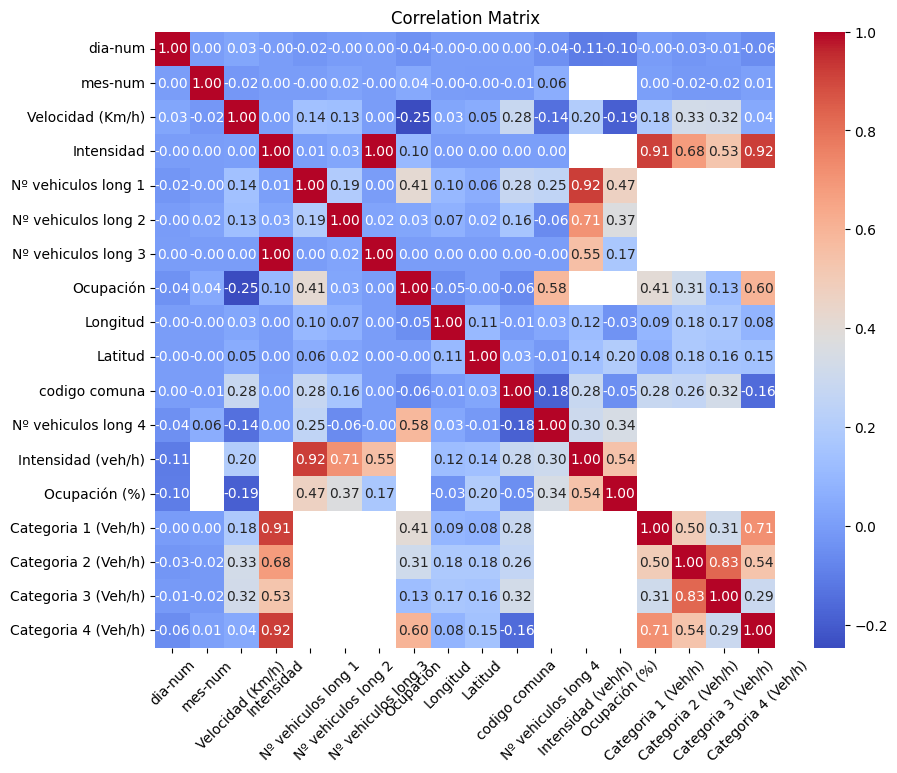

In [25]:
# Calculate the correlation matrix
correlation_matrix = Mob.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Matrix')

# Rotate the tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()